# Adaptive Stochastic Gradient Descend Application
For large scale ML AdalineSGD is more efficient than AdalineGD. As the weight update per each sample batch it is usually faster to reach the minimun than other method. Also being learning on each feature set it can be used on online learning.

### Regular Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np

In [2]:
# Plot setting
plt.style.use('bmh')
plt.rcParams["font.size"] = "20"

### Data Load & Exploration

In [3]:
df = (
    pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
        header=None)
)

In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Preprocession

In [5]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length, a 2 dimentional array
X = df.iloc[0:100, [0, 2]].values

In [6]:
print("Feature Matrix : \n", X[:3])
print("Target Column Vector : \n", y[:3])

Feature Matrix : 
 [[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]]
Target Column Vector : 
 [-1 -1 -1]


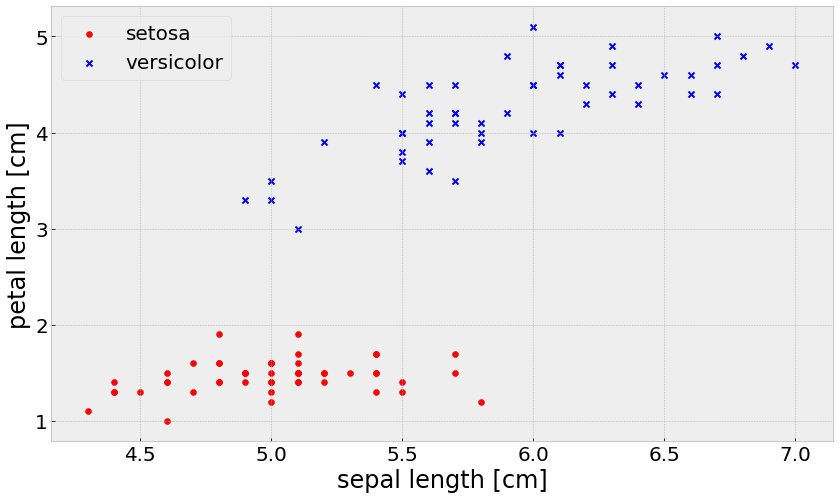

In [7]:
plt.figure(figsize=(14,8))
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Data Pre Processiong

In [8]:
# Apply Normalizaiton
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

### Training A Model

In [9]:
from neuralbase import AdalineSGD

In [14]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

### Evaluating The Model

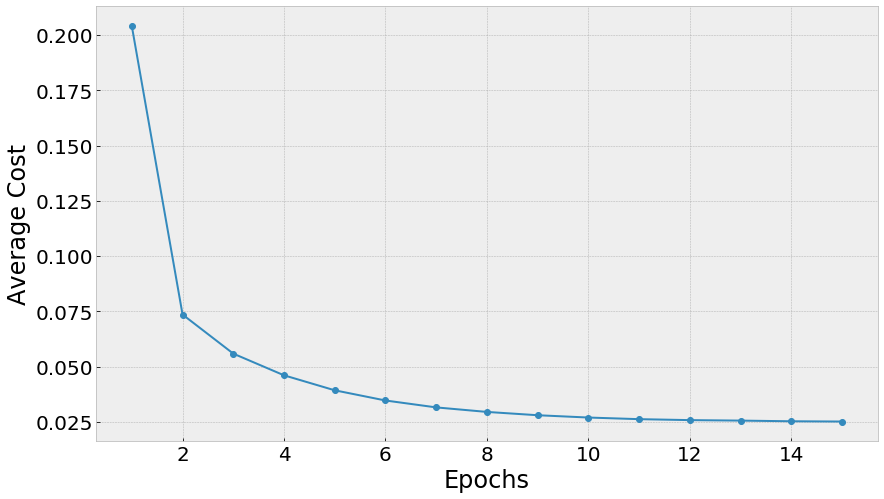

In [17]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

### Checking The Disission Boundry

In [15]:
from neuralbase import plot_decision_regions

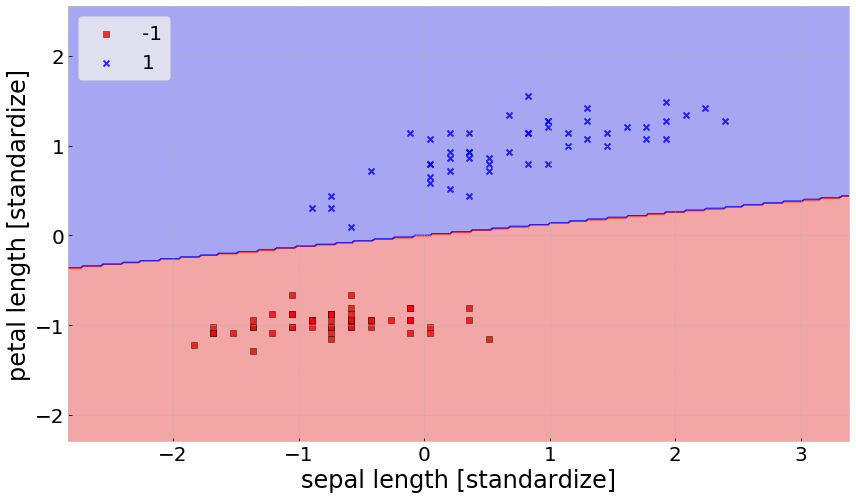

In [18]:
plt.figure(figsize=(14, 8))
plot_decision_regions(X_std, y, classifier=ada)
plt.xlabel('sepal length [standardize]')
plt.ylabel('petal length [standardize]')
plt.legend(loc='upper left')

*Note: Result Shows the Adaline SGD Algorithm was able to seperate the region successfully*

### Referances

[1] [Python Machine Learning](https://sebastianraschka.com/books.html)